<a href="https://colab.research.google.com/github/programmermahi/Al-Powered-Stress-Detection/blob/main/stress_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
        EDA         HR        HRV       Temp  Stress
0  0.549671  84.261775  70.990332  36.889181       1
1  0.486174  94.094166  63.869505  36.224407       1
2  0.564769  61.014324  50.894456  36.090901       1
3  0.652303  80.629692  40.295948  36.498313       1
4  0.476585  68.493574  60.473350  36.414908       0


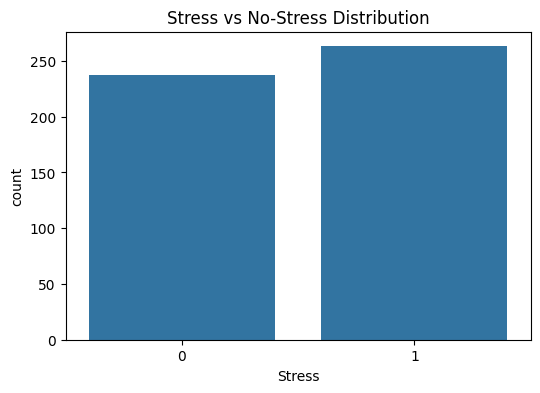

Logistic Regression Accuracy: 0.76
Random Forest Accuracy: 0.99

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.98      1.00      0.99        55

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



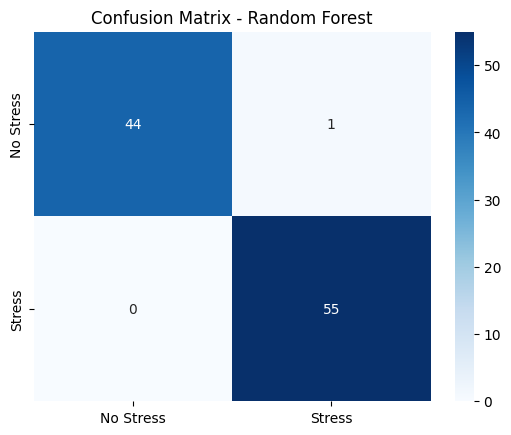

In [2]:
# 📌 Stress Detection using Machine Learning
# Run this notebook in Google Colab

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# 1. Generate Synthetic Dataset
# -----------------------------
np.random.seed(42)

n_samples = 500
eda = np.random.normal(0.5, 0.1, n_samples)          # Electrodermal Activity
hr = np.random.normal(75, 10, n_samples)             # Heart Rate
hrv = np.random.normal(50, 15, n_samples)            # Heart Rate Variability
temp = np.random.normal(36.5, 0.5, n_samples)        # Body Temp

# Stress label (0 = No Stress, 1 = Stress)
labels = (eda > 0.55).astype(int) | (hr > 80).astype(int)

data = pd.DataFrame({
    "EDA": eda,
    "HR": hr,
    "HRV": hrv,
    "Temp": temp,
    "Stress": labels
})

print("Sample Data:")
print(data.head())

# -----------------------------
# 2. Visualization
# -----------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="Stress", data=data)
plt.title("Stress vs No-Stress Distribution")
plt.show()

# -----------------------------
# 3. Preprocessing
# -----------------------------
X = data.drop("Stress", axis=1)
y = data["Stress"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -----------------------------
# 4. Model Training
# -----------------------------
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# -----------------------------
# 5. Evaluation
# -----------------------------
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stress", "Stress"], yticklabels=["No Stress", "Stress"])
plt.title("Confusion Matrix - Random Forest")
plt.show()